<a href="https://colab.research.google.com/github/eordog/erdos_artemis/blob/main/brain_tumor_test_12_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Create labels

In [ ]:
labels = ['glioma_coronal','meningioma_coronal','pituitary_coronal','no_coronal','glioma_sagittal','meningioma_sagittal','pituitary_sagittal','no_sagittal','glioma_transverse','meningioma_transverse','pituitary_transverse','no_transverse']

Import dataset

In [ ]:
X_train = []
y_train = []

image_size = 160 # One of the custom image size for MobileNetV2
for i in labels:
    folderPath = os.path.join('/content/gdrive/MyDrive/Brain_Tumor_Data_Final','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/gdrive/MyDrive/Brain_Tumor_Data_Final','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

  0%|          | 1/276 [00:00<03:02,  1.50it/s]

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=202)

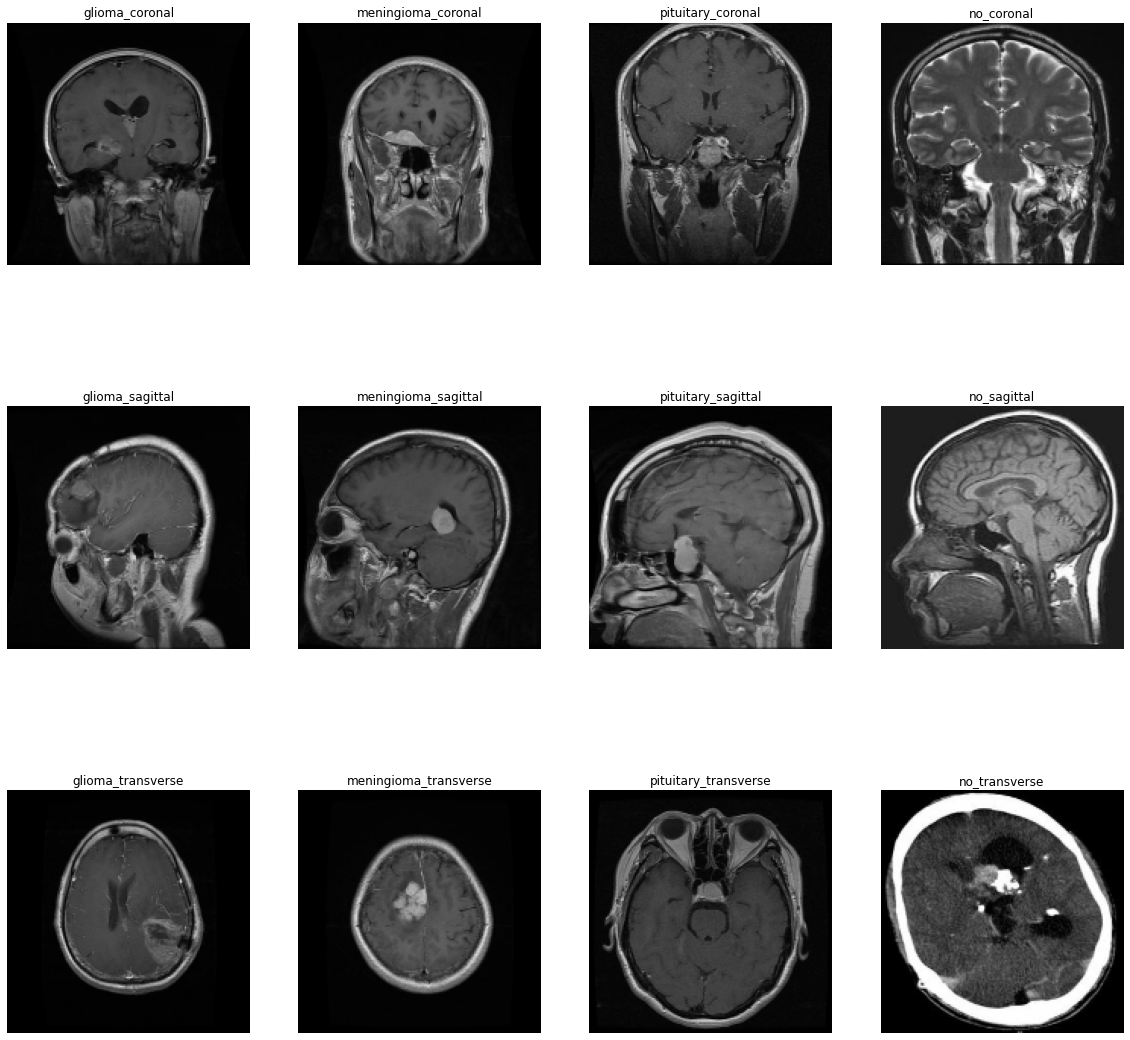

In [ ]:
k=0
l=0
fig, ax = plt.subplots(3,4,figsize=(20,20))
for i in labels:
    j=0
    while True:
        if y_train[j]==i:
            ax[k,l].imshow(X_train[j])
            ax[k,l].set_title(y_train[j])
            ax[k,l].axis('off')
            l+=1
            if l==4:
              l=0
              k+=1
            break
        j+=1

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=201)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
#effnet = EfficientNetB3(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
mobnet = MobileNetV2(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3),alpha=1.0)

In [ ]:
#model = effnet.output
model = mobnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(12,activation='softmax')(model)
#model = tf.keras.models.Model(inputs=effnet.input, outputs = model)
model = tf.keras.models.Model(inputs=mobnet.input, outputs = model)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_7[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint_filepath = '/content/gdrive/MyDrive/Save_Model'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.35, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =30, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/30
82/83 [============================>.] - ETA: 0s - loss: 0.8085 - accuracy: 0.7424
Epoch 1: val_accuracy improved from -inf to 0.13311, saving model to /content/gdrive/MyDrive/Save_Model
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Save_Model/assets
83/83 [==============================] - 32s 323ms/step - loss: 0.8090 - accuracy: 0.7420 - val_loss: 25.4206 - val_accuracy: 0.1331 - lr: 0.0010
Epoch 2/30
82/83 [============================>.] - ETA: 0s - loss: 0.3595 - accuracy: 0.8849
Epoch 2: val_accuracy improved from 0.13311 to 0.14334, saving model to /content/gdrive/MyDrive/Save_Model
INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Save_Model/assets
83/83 [==============================] - 28s 340ms/step - loss: 0.3616 - accuracy: 0.8847 - val_loss: 13.5818 - val_accuracy: 0.1433 - lr: 0.0010
Epoch 3/30
82/83 [============================>.] - ETA: 0s - loss: 0.3146 - accuracy: 0.8990
Epoch 3: val_accuracy did not improve from 0.14334
83/83 [===

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.94      0.97      0.95        30
           2       1.00      0.93      0.96        27
           3       0.97      0.91      0.94        35
           4       0.96      0.96      0.96        26
           5       1.00      0.92      0.96        25
           6       0.90      1.00      0.95        26
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        27
           9       0.50      0.50      0.50         2
          10       0.94      0.94      0.94        18
          11       0.91      0.98      0.94        41

    accuracy                           0.96       325
   macro avg       0.93      0.92      0.92       325
weighted avg       0.96      0.96      0.96       325



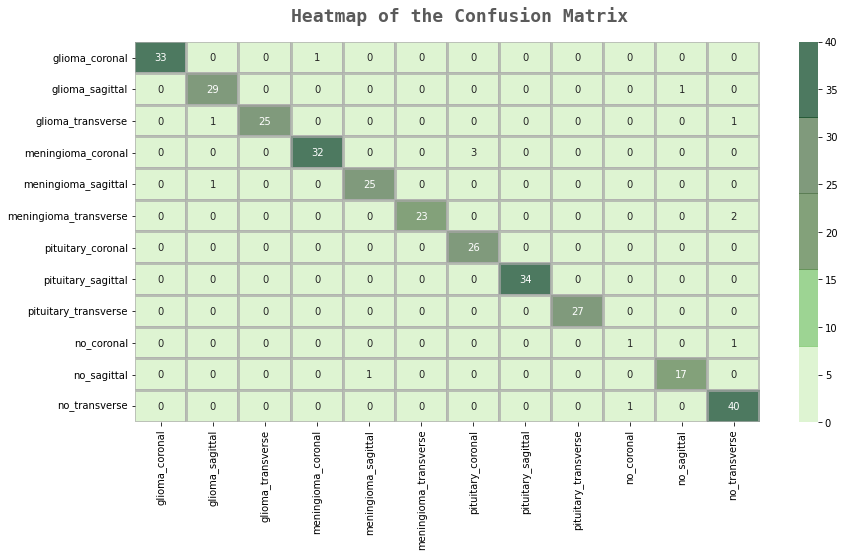

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()